In [ ]:
#Instrucciones

In [174]:
#Durante las cuarentenas, una pregunta que se hizo el Ministerio de Transporte fue si las personas usaban más el auto, 
#o caminaban, y si los parques se visitaban más. Apple y Google sacaron los "mobility" reports, que tienen, a nivel de 
#region, la movilidad de la población.

#https://covid19.apple.com/mobility (Enlaces a un sitio externo.)

#https://www.google.com/covid19/mobility/ (Enlaces a un sitio externo.) 

#Su misión es tratar de contestar esas preguntas de más arriba, usando al menos un gráfico para cada una.

# Personas Caminar vs Conducir , Chile. 

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [214]:
Datos = pd.read_csv("C:/Users/Jojim/Desktop/applemobilitytrends-2021-12-08.csv") #Obtención de datos

C:\Users\Jojim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [215]:
Datos

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,184.97,200.06,200.28,204.75,242.15,245.19,157.62,197.62,186.69,191.71
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,147.09,160.43,133.94,163.62,270.80,177.71,133.40,164.36,166.46,176.96
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,161.02,160.95,170.27,164.70,201.53,190.09,132.93,155.47,168.96,169.29
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,149.77,146.23,149.87,149.14,179.34,158.87,125.10,151.27,156.07,157.59


In [216]:
DatosGeo=Datos[Datos["geo_type"]=="country/region"]
DatosGeo.drop("alternative_name",axis=1,inplace=True) #Eliminar columna "alternative_name"
DatosGeo.drop("sub-region",axis=1,inplace=True) #Eliminar columna "sub-region"
DatosGeo.drop("country",axis=1,inplace=True) #Eliminar columna "country"
DatosGeo.drop("geo_type",axis=1,inplace=True) #Eliminar columna "geo_type"
DatosGeo

C:\Users\Jojim\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,Albania,driving,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,...,166.94,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58
1,Albania,walking,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,...,164.26,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65
2,Argentina,driving,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,...,86.90,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74
3,Argentina,walking,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,...,89.50,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15
4,Australia,driving,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,...,120.49,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,United States,walking,100.0,99.59,101.87,100.60,121.36,132.38,100.10,94.79,...,135.93,142.73,151.78,158.66,205.96,232.39,145.03,143.51,146.44,150.56
149,Uruguay,driving,100.0,96.84,92.90,103.48,114.91,115.03,99.48,93.30,...,79.23,85.98,90.18,91.12,124.98,145.29,85.88,92.31,100.00,100.07
150,Uruguay,walking,100.0,94.90,78.04,100.46,105.04,98.78,76.52,89.94,...,83.41,98.29,102.14,102.63,125.87,131.05,67.79,100.52,122.10,111.20
151,Vietnam,driving,100.0,104.96,108.67,107.09,121.07,130.40,123.99,122.77,...,92.53,92.20,92.38,92.24,99.93,109.52,100.29,93.76,95.12,97.06


In [217]:
DatosCHL=DatosGeo[DatosGeo["region"]=="Chile"]
DatosCHL

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
22,Chile,driving,100.0,99.01,102.57,106.47,124.69,120.83,97.12,102.53,...,103.53,109.32,114.46,115.37,158.26,153.99,106.04,118.25,137.21,112.95
23,Chile,walking,100.0,102.58,103.13,103.74,107.87,86.73,59.44,99.53,...,109.52,116.08,123.24,122.84,151.82,132.18,79.77,129.48,144.41,95.62


In [218]:
Datosmelt=DatosCHL.melt(id_vars=["region","transportation_type"],var_name="fecha")
Datosmelt

,region,transportation_type,fecha,value
0,Chile,driving,2020-01-13,100.00
1,Chile,walking,2020-01-13,100.00
2,Chile,driving,2020-01-14,99.01
3,Chile,walking,2020-01-14,102.58
4,Chile,driving,2020-01-15,102.57
...,...,...,...,...
1387,Chile,walking,2021-12-06,129.48
1388,Chile,driving,2021-12-07,137.21
1389,Chile,walking,2021-12-07,144.41
1390,Chile,driving,2021-12-08,112.95


In [219]:
Datosmelt["fecha"]=pd.to_datetime(Datosmelt["fecha"])  #Convierte argumento fecha en Datatime

In [220]:
df = pd.DataFrame(Datosmelt["fecha"])
df['mes'] = pd.DatetimeIndex(df['fecha']).month
df['Medio de transporte'] = Datosmelt["transportation_type"]
df['Valores'] = Datosmelt["value"]

In [221]:
df

,fecha,mes,Medio de transporte,Valores
0,2020-01-13,1,driving,100.00
1,2020-01-13,1,walking,100.00
2,2020-01-14,1,driving,99.01
3,2020-01-14,1,walking,102.58
4,2020-01-15,1,driving,102.57
...,...,...,...,...
1387,2021-12-06,12,walking,129.48
1388,2021-12-07,12,driving,137.21
1389,2021-12-07,12,walking,144.41
1390,2021-12-08,12,driving,112.95


In [222]:
Walking=df[df["Medio de transporte"]=="walking"]

In [223]:
Driving=df[df["Medio de transporte"]=="driving"]

<AxesSubplot:xlabel='mes', ylabel='Valores'>

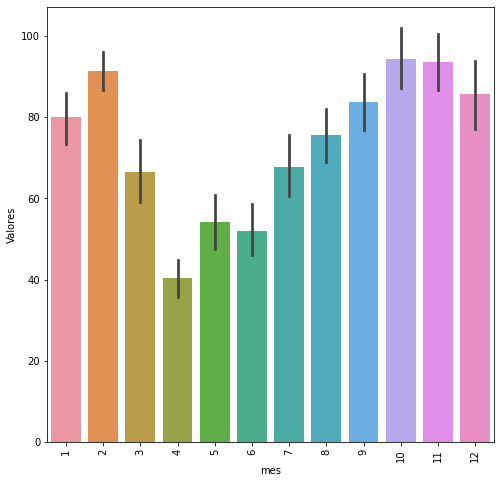

In [224]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
sns.barplot(x="mes", y="Valores",data=Walking)


<AxesSubplot:xlabel='mes', ylabel='Valores'>

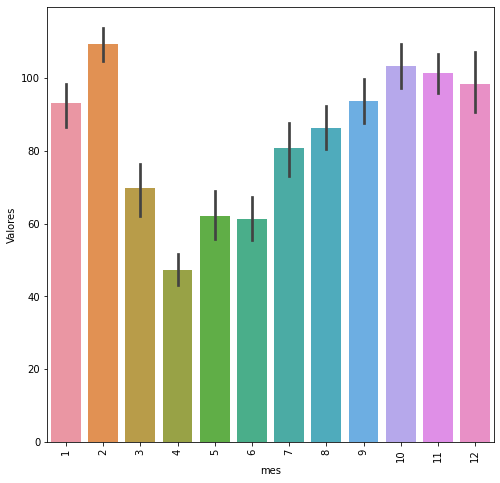

In [225]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.xticks(rotation='vertical')
sns.barplot(x="mes", y="Valores",data=Driving)
